# Plot 1: Exolanet mass vs. orbital period

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define some global constants
plt.rcParams["figure.figsize"] = (12.8, 7.2)
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 16 
plt.rcParams["legend.fontsize"] = 12 
plt.rcParams["legend.title_fontsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["lines.markersize"] = 6
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.3

df = pd.read_csv("Ex1_data.csv")

# what do we care about?
# the period and mass of course, but we want to colour the points based on how they are discovered.
df = df[["pl_orbper", "pl_masse", "discoverymethod"]]
df.head()

,pl_orbper,pl_masse,discoverymethod
0,3.234699,NaN,Transit
1,3.234700,212.31044,Transit
2,3.234699,NaN,Transit
3,3.234694,NaN,Transit
4,3.234699,NaN,Transit


Now we can worry about the nulls

In [24]:
# drop the nulls
df.dropna(inplace=True)
df.head()

,pl_orbper,pl_masse,discoverymethod
1,3.234700,212.31044,Transit
5,3.234699,205.63601,Transit
6,3.234723,212.61900,Transit
16,3.234702,201.18639,Transit
52,8.752097,1.29837,Transit


In [25]:
# how many planets are we plotting? (spoiler: the answer is 3573)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3573 entries, 1 to 38504
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_orbper        3573 non-null   float64
 1   pl_masse         3573 non-null   float64
 2   discoverymethod  3573 non-null   object 
dtypes: float64(2), object(1)
memory usage: 111.7+ KB


In [26]:
# take a look at all unique methods
methods = df["discoverymethod"].unique()
print(methods)

['Transit' 'Radial Velocity' 'Imaging' 'Eclipse Timing Variations'
 'Microlensing' 'Pulsar Timing' 'Orbital Brightness Modulation'
 'Transit Timing Variations' 'Astrometry']


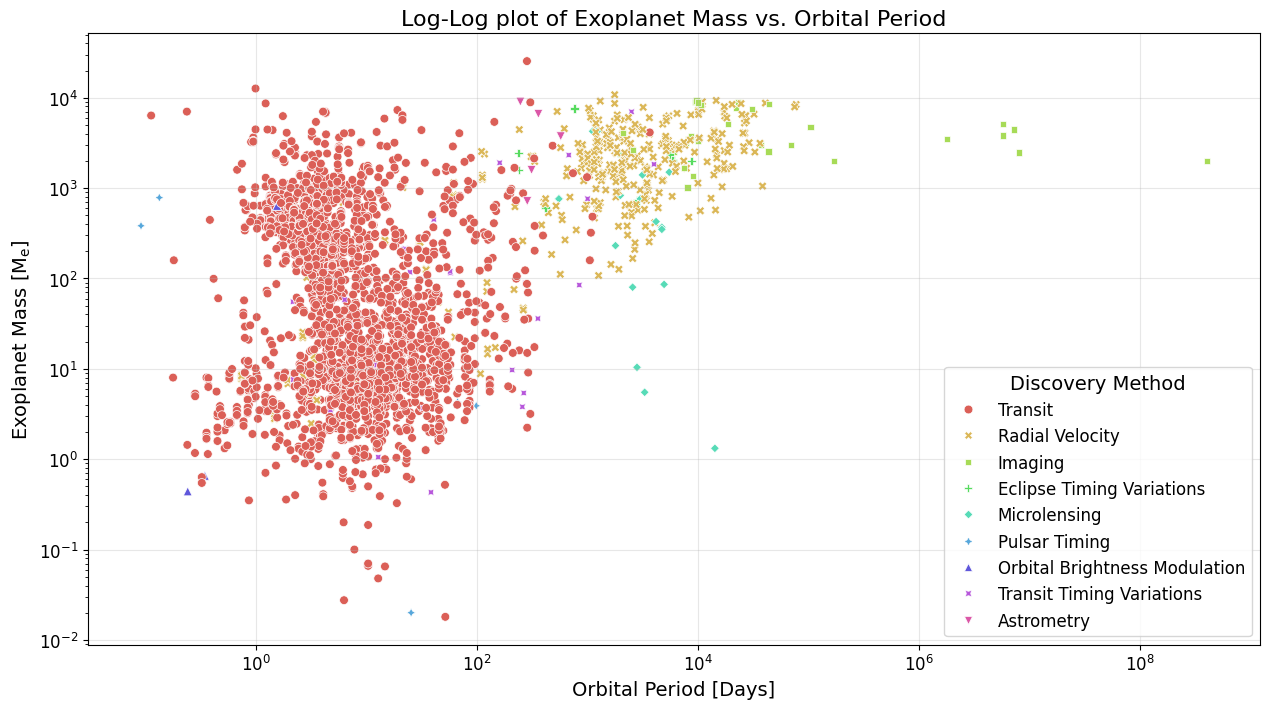

In [27]:
# create a colourmap based on the methods
import seaborn as sns

fig, ax = plt.subplots()
sns.scatterplot(
    data=df, 
    x="pl_orbper", 
    y="pl_masse", 
    hue="discoverymethod", 
    style="discoverymethod",
    palette=sns.hls_palette(len(methods)), 
    ax=ax,
    s=40
)

# want a log-log
ax.set_xscale("log")
ax.set_yscale("log")

ax.legend(title="Discovery Method")
plt.title("Log-Log plot of Exoplanet Mass vs. Orbital Period")
ax.set_xlabel("Orbital Period [Days]")
ax.set_ylabel(r"Exoplanet Mass [$\text{M}_\text{e}$]")

plt.tight_layout()
plt.show()

# Discussion

It seems like we have two main methods of discovering these exoplanets. "Transit" and "radial velocity", and it also appears that they are each viable for different orbital periods.

Detecting the exoplanets which have an orbital period of $\sim 1-100$ days seems to work best through transit, which slower orbiting exoplanets ($\sim 100-10000$ days) are more easily detected through radial velocity analysis.

We have a similar extension of this idea with imaging, which seems to pick up planets with much slower orbits.

We notice that mass has relatively little effect on the effective discovery method.

Let's look at the Newtonian description of Kepler's third law:

$\rightarrow P^2 = \frac {4\pi^2 a^3} {G (M_{\text{star}}+M_{\text{planet}})}$

Since the stellar mass $M_{\text{star}}\gg M_{\text{planet}}$, the orbital period of a planet depends primarily on the stellar mass and the orbital radius aa.

We notice in the plot above that exoplanets with slower orbits tend to have higher masses. This is not a consequence of the dynamics described by Kepler’s law, however, but rather implies an observational selection effect: detecting low-mass planets at large orbital distances seems to be extremely difficult, so only the more massive planets are found at long periods using current techniques.

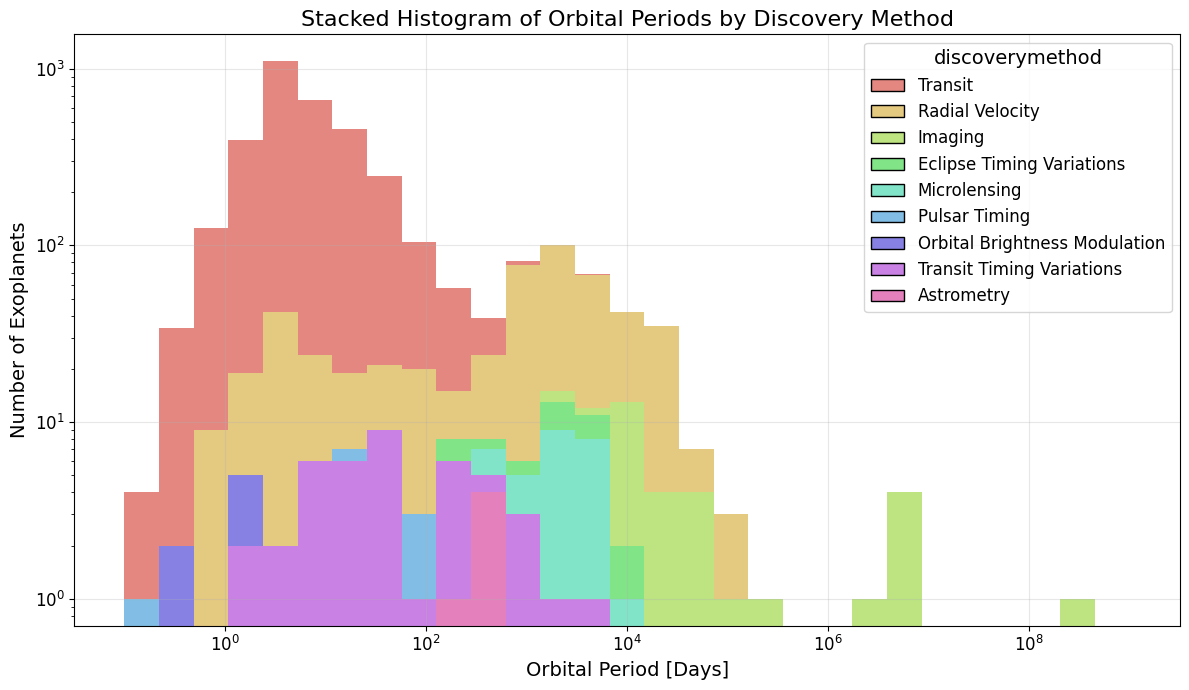

In [28]:
# Plot a histogram of each technique over orbital period
plt.figure(figsize=(12, 7))

# Create logarithmic bins
bins = np.logspace(-1, 9, 30)

sns.histplot(
    data=df,
    x="pl_orbper",
    hue="discoverymethod",
    bins=bins,
    multiple="stack",
    palette=sns.hls_palette(len(methods)),
)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital Period [Days]")
plt.ylabel("Number of Exoplanets")
ax.legend(title="Discovery Method")
plt.title("Stacked Histogram of Orbital Periods by Discovery Method")
plt.tight_layout()
plt.show()

This histogram highlights the point made earlier. Purely for illustrative purposes, we shall make a bar graph of the number of contributions to the total that each method made.

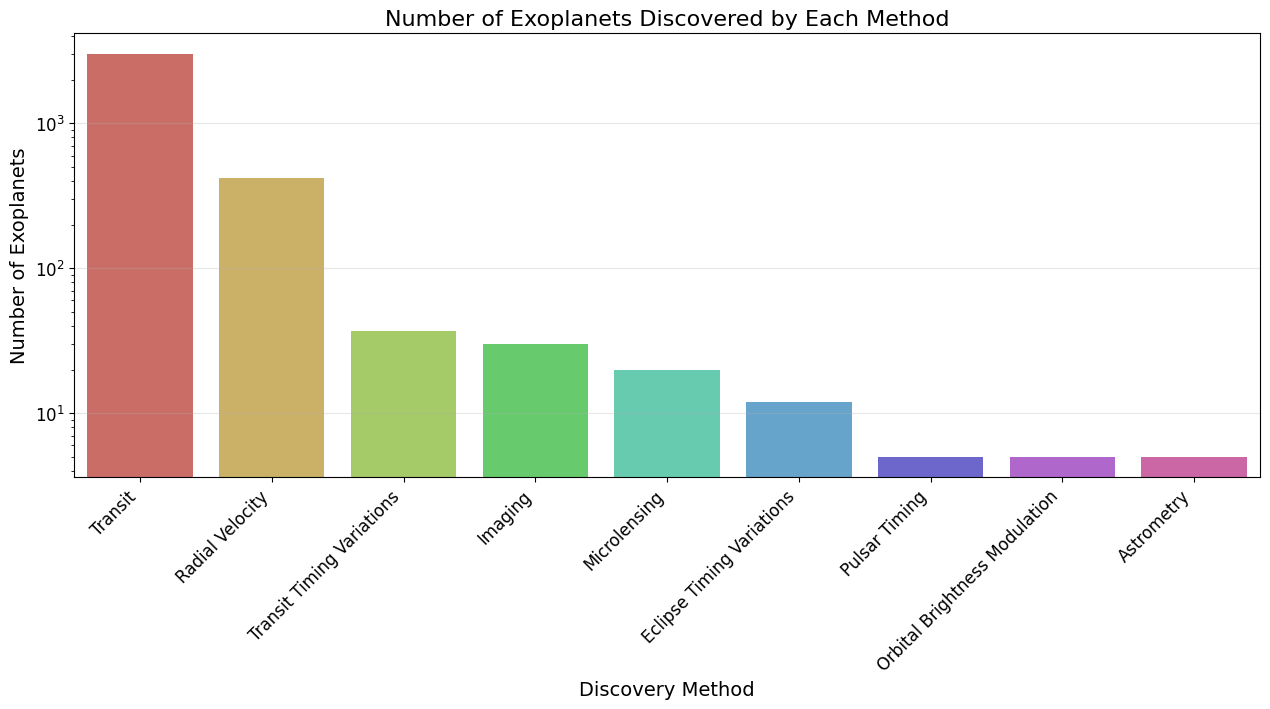

In [31]:
# Count the number of exoplanets discovered by each method
method_counts = df["discoverymethod"].value_counts()

plt.figure()
sns.barplot(
    x=method_counts.index, 
    hue=method_counts.index,
    y=method_counts.values, 
    palette=sns.hls_palette(len(methods)),
    legend=False
)

# scale y axis
plt.yscale("log")

plt.xticks(rotation=45, ha='right')
plt.xlabel("Discovery Method")
plt.ylabel("Number of Exoplanets")
plt.title("Number of Exoplanets Discovered by Each Method")
plt.tight_layout()
plt.show()